<a href="https://colab.research.google.com/github/JhonasSilva/My-cod/blob/main/Analise_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


##1. Qual categoria gera o maior faturamento total?

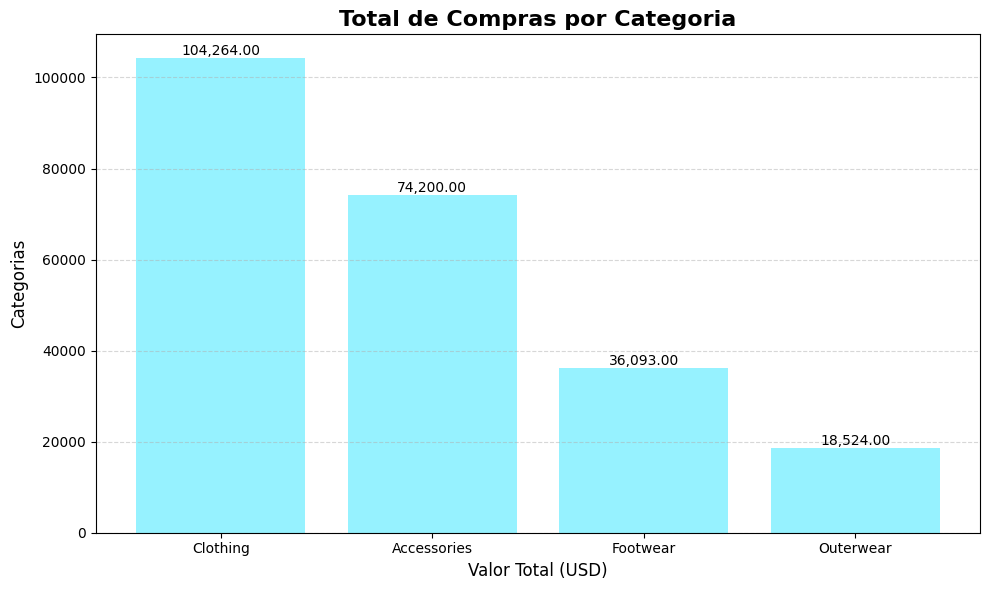

In [149]:
maior_fat = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(maior_fat.index, maior_fat.values,  color="#00E1FF69")

for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y, f'{y:,.2f}', ha='center', va='bottom')

plt.title('Total de Compras por Categoria', fontsize=16, fontweight='bold')
plt.xlabel('Valor Total (USD)', fontsize=12)
plt.ylabel('Categorias', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

A categoria que gera o maior faturamento total é a categoria Clothing, com um total de USD 104.264.
Cheguei a esse resultado somando os valores de compra de cada categoria e comparando o
total gerado por cada uma delas. A categoria Clothing apresentou o maior volume financeiro acumulado,
destacando-se como a principal responsável pelo faturamento.


##2. Qual é o ticket médio dos clientes?


In [150]:
media_compras = df['Purchase Amount (USD)'].mean()
print(f'A media do ticket é {media_compras:.2f} gasto por compra')

A media do ticket é 59.76435897435898 gasto por compra


O ticket médio dos clientes é de USD 59.76. Esse valor foi obtido dividindo o faturamento
total pelo número de compras realizadas. O ticket médio representa quanto, em média, cada cliente gasta por transação.


##3. Clientes assinantes (“Subscription Status = Yes”) gastam mais do que não-assinantes?

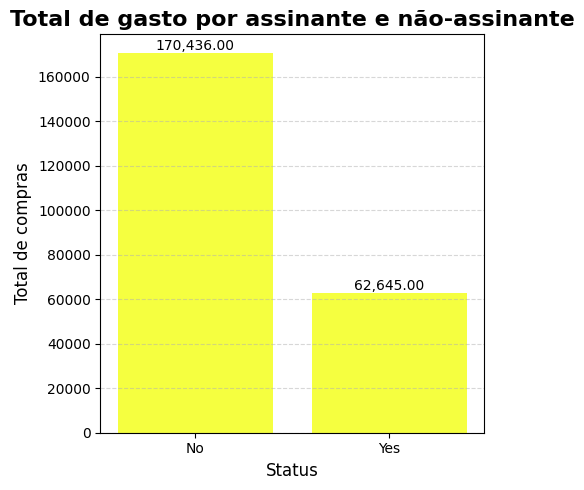

In [132]:
assinatura = df.groupby('Subscription Status')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(5, 5))
bars = plt.bar(assinatura.index, assinatura.values, color='#F2FF00BF')

for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y, f'{y:,.2f}', ha='center', va='bottom')

plt.title('Total de gasto por assinante e não-assinante', fontsize=16, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Total de compras', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

Os clientes que nao tem assinatura gasta mais no total de 170.436 em compras, enquanto os cliente que tem assinatura
gastam 62.645. Isso indica que os não assinantes são responsavel por uma fatia maior do faturamento.

##4. Qual método de pagamento é o mais utilizado?

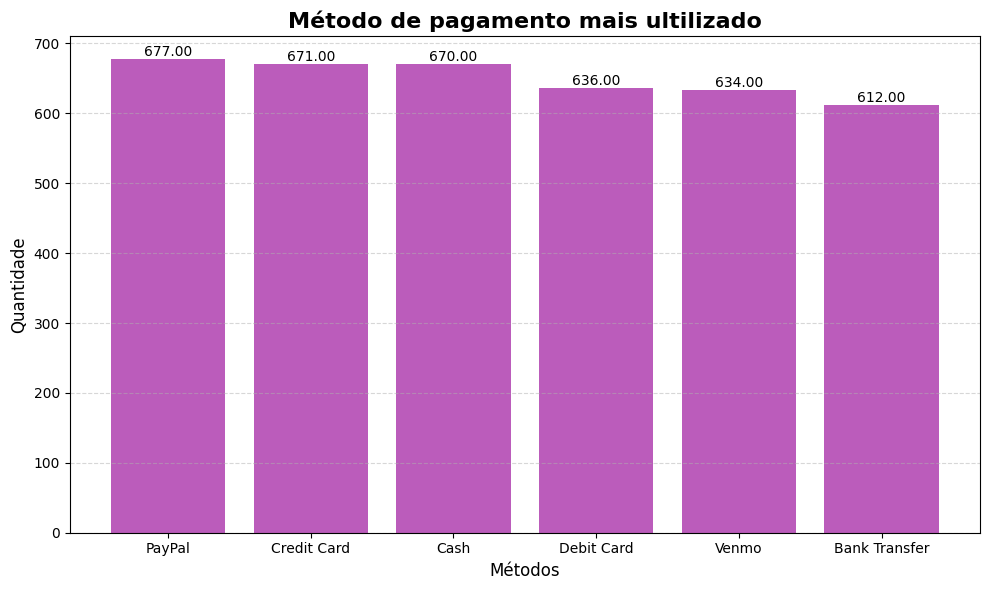

In [146]:
forma_pag = df['Payment Method'].value_counts().sort_values(ascending=False).rename('Quantidade')
plt.figure(figsize=(10, 6))
bars = plt.bar(forma_pag.index, forma_pag.values, color='#AE3DAED6')

for bar in bars:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.title('Método de pagamento mais ultilizado', fontsize=16, fontweight='bold')
plt.xlabel('Métodos', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

O método de pagamento mais utilizado é PayPal. Essa conclusão foi obtida contando o número de transações realizadas com cada
método de pagamento. O método PayPal apresentou a maior frequência, indicando que ele é o preferido pelos clientes ao realizar compras.

##5. Compras com desconto têm valor maior ou menor que compras sem desconto?


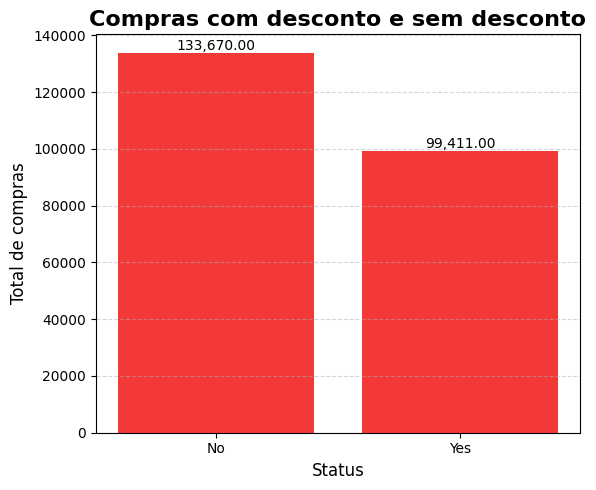

In [152]:
compras = df.groupby('Discount Applied')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(6,5))
bars = plt.bar(compras.index, compras.values, color="#F11111D5")

for bar in bars:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  plt.text(x, y, f'{y:,.2f}', ha='center', va='bottom')

plt.title('Compras com desconto e sem desconto', fontsize=16, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Total de compras', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

As compras com desconto apresentam um valor de (USD) 99.411 no total, enquanto as compras sem desconto é de (USD) 133.670.
Isso mostra que compras com desconto tendem a ter valores menores, sugerindo que os descontos são aplicados em produtos mais baratos
ou em compras de menor valor.

##6. Qual tipo de envio (“Shipping Type”) é o mais escolhido?

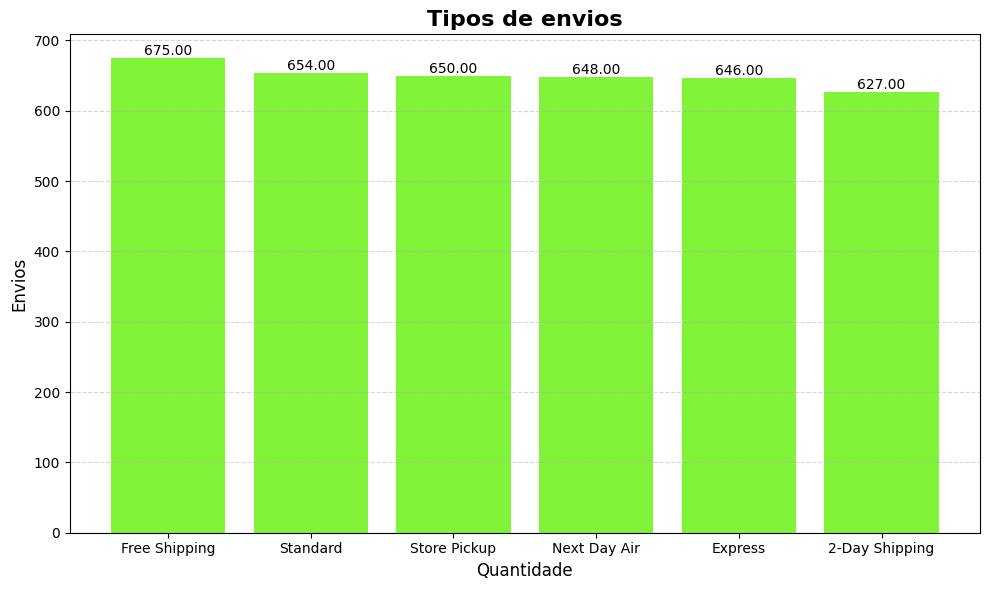

In [135]:
tipo_envio = df['Shipping Type'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(tipo_envio.index, tipo_envio.values, color='#67F111D4')

for bar in bars:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.title('Tipos de envios', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Envios', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

O tipo de envio mais escolhido é Free Shipping. Isso foi determinado contando o número de pedidos realizados em cada tipo de envio.
O método Free Shipping apresentou a maior frequência, indicando que ele é o preferido pelos clientes.

##7. Qual Estado (“Location”) mais gasta?

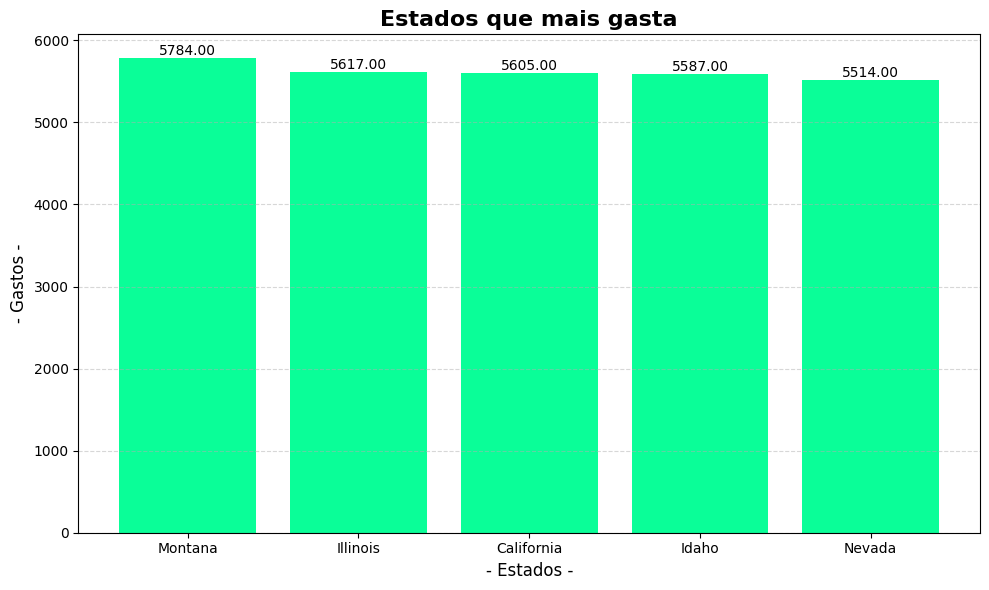

In [136]:
local = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
bars = plt.bar(local.index, local.values, color="#00FE94F5")

for bar in bars:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.title('Estados que mais gasta', fontsize=16, fontweight='bold')
plt.xlabel('- Estados -', fontsize=12)
plt.ylabel('- Gastos -', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

O Estado que mais gasta é Montana. Esse resultado foi obtido somando o valor total das compras realizadas em cada Estado.
O Estado Montana apresentou o maior faturamento, indicando ser a região com maior volume financeiro no período analisado.


##8. Existe relação entre idade e valor gasto?

In [137]:
faixa = [18, 30, 40, 50, 60, 70]
categorias = ['Joven Adulto', 'Adulto', 'Meia idadae', 'Senior', 'Idosos']

df['Faixa_Etaria'] = pd.cut(df['Age'], bins=faixa, labels=categorias, right=False)

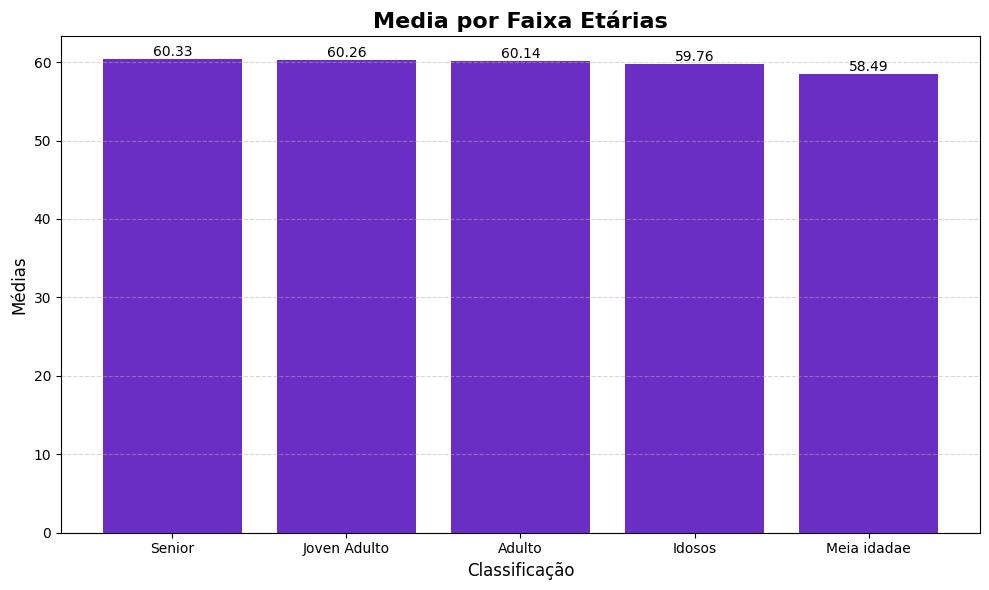

In [145]:
idade = df.groupby(['Faixa_Etaria'], observed=True)['Purchase Amount (USD)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(idade.index, idade.values, color='#6425C3F5')

for bar in bars:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.title('Media por Faixa Etárias', fontsize=16, fontweight='bold')
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Médias', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

In [139]:
df['Faixa_Etaria'].value_counts()

,count
Faixa_Etaria,
Joven Adulto,878
Senior,771
Meia idadae,739
Adulto,724
Idosos,721


In [140]:
df.groupby('Faixa_Etaria', observed=True)['Purchase Amount (USD)'].std()

,Purchase Amount (USD)
Faixa_Etaria,
Joven Adulto,23.841058
Adulto,23.404640
Meia idadae,23.388978
Senior,23.753687
Idosos,23.980172


Com base na análise das médias de gasto em cada faixa etária, não foi identificada uma relação forte entre idade e o valor gasto.
As diferentes faixas apresentam médias bastante próximas, indicando que a idade não influencia de forma significativa o gasto médio.
As faixas etárias têm tamanhos semelhantes e apresentam médias de gasto quase idênticas. Como o desvio padrão dos valores de compra (~23)
é muito maior que as pequenas diferenças entre as faixas, conclui-se que não existe relação significativa entre idade e valor gasto.
